## Objetivo

¿Qué buscamos al explorar nuestros datos? Predecir el gpa_2023

### Hipótesis:
1. La carrera tiene impacto en las notas del estudiante
2. "How often do you go out partying/socialising during the week?	" tiene un impacto negativo en las notas del estudiante (a mayor cantidad de salidas menor será la nota final)
3. Las becas juegan un papel importante en la nota del alumno (si tiene beca, espero que tenga mejores notas)
4. La cantida de horas de estudio impacta en gpa_2023
5. A mayor cantidad de tragos por noche, las notas del alumno serán mas bajas
6. Si un alumno está en una relación, peor serán sus calificaciones
7. parent_strength. Si el alumno es más pegado a la flia, mejor será la calificación

In [4]:
import pandas as pd # importamos pandas como lib de manejo de datos

In [5]:
df = pd.read_csv('./alcohol.csv')

In [19]:
# df.head(3)

In [16]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [18]:
df.head(2)

,survey_timestamp,gender,high_school_gpa,year_of_study_2023,faculty,gpa_2023,accommodation_status_2023,scholarship_2023,additional_study_hours,How often do you go out partying/socialising during the week?,alcohol_consumption_per_outing,alcohol_related_absences,failed_modules,in_a_relationship,parental_approval_of_alcohol,parent_relationship_strength
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close


### Describe()
```
    df.describe()
```

In [21]:
df.describe() # da 

,high_school_gpa,gpa_2023
count,399.000000,320.000000
mean,77.989724,66.268469
std,7.048618,9.147906
min,34.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


> Lectura del percentil: 

Altura 1.75 P50 -> El 50% de las personas miden 1.75 o menos
Altura 1.90 p90 -> El 90% de los hombres mide 1.90 

### Imputación de datos

Reemplazar / eliminar valores faltantes en un conjunto de datos con valores estimados o constantes (edad NaN) -> 20

- Valor constante: Reemplazar un valor faltante por un valor constante
- Reemplazar por alguna medida de tendencia central:
    - Media: Apropiado para datos continuos
    - Mediana: Mejor para datos con outliers
    - Moda: (valor que más se repite en un conjunto) -> cuando la variable es categórica

Usar agrupaciónes: Calcular media, mediana o moda a partir de estratos relevantes

Si tengo agrupaciones relevantes (tipo de carrera) -> calcular la media del grupo -> imputar los datos faltantes

In [30]:
# Cantidad total de nulos agrupados por campo
df.isnull().sum()

survey_timestamp                                                   0
gender                                                             2
high_school_gpa                                                    7
year_of_study_2023                                                73
faculty                                                            7
gpa_2023                                                          86
accommodation_status_2023                                         23
scholarship_2023                                                   8
additional_study_hours                                             3
How often do you go out partying/socialising during the week?      2
alcohol_consumption_per_outing                                     2
alcohol_related_absences                                           3
failed_modules                                                     3
in_a_relationship                                                  3
parental_approval_of_alcohol      

In [28]:
# Listar los elementos unicos de la columna 'gender'
df['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [34]:
df['accommodation_status_2023'].unique()

array(['Private accommodation/ stay with family/friends', nan,
       'Non-private accommodation ie. Res'], dtype=object)

In [36]:
df['parent_relationship_strength'].unique()

array(['Very close', 'Fair', 'Close', 'Distant', nan], dtype=object)

In [39]:
df['year_of_study_2023'].unique()

array(['2nd Year', '1st Year', nan, '3rd Year', '4th Year',
       'Postgraduate'], dtype=object)

df

In [41]:
# gender_mode = df['gender'].mode()
df['gender'].fillna('unknown', inplace=True) 

In [44]:
df['gender'].unique()

array(['Female', 'Male', 'unknown'], dtype=object)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns #alias

### Matplotlib

Matplotlib es un biblioteca en Python. Visualizacion de datos (graficos, mapas de calor, histogramas, graficos de pastel)

- Personalización
- Soporte para multiples formatos graficos (PNG, PDF, SVG)
- Performance es buena 

### Seaborn
Seaborn es una librería BASADA en Matplotlib

Ventajas:
- Menos código necesario comparado con matplotlib
- Representaciones visuales más atractivas
- Mejor integración con librerias de manejo de datos (pandas, polars, etc)

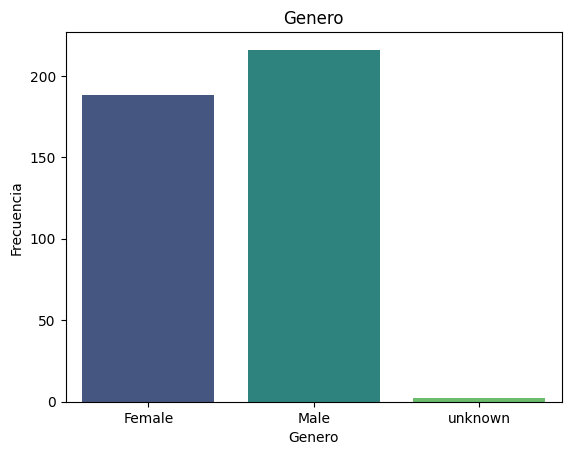

In [62]:
# mostrar proporcion entre sexo masculino y femenino
sns.countplot(data=df,x='gender', palette='viridis') #por adentro seaborn uso matplotlib para dibujar en pantalla
plt.title("Genero", fontsize=12)
plt.xlabel("Genero")
plt.ylabel("Frecuencia")
plt.show()
# plt.grid()
# sacar el AxesSubplot ...

In [63]:
df.head(2)

,survey_timestamp,gender,high_school_gpa,year_of_study_2023,faculty,gpa_2023,accommodation_status_2023,scholarship_2023,additional_study_hours,How often do you go out partying/socialising during the week?,alcohol_consumption_per_outing,alcohol_related_absences,failed_modules,in_a_relationship,parental_approval_of_alcohol,parent_relationship_strength
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close


In [59]:
# df['high_school_gpa'].describe()

In [56]:
high_school_gpa_median = df['high_school_gpa'].median()
high_school_gpa_median

78.0

In [65]:
# Sobre que element me quiero parar, que voy a hacer con ese elemento (fillna), por que valor lo quiero reemplazar, quiero reemplazar eso en el dataset
# Tipo de variable: numerica continua (lineas, histograma, diagrama de caja, diagrama de violin)
df['high_school_gpa'].fillna(high_school_gpa_median, inplace=True)

In [72]:
df['high_school_gpa'].isnull().sum()

0

In [73]:
df['high_school_gpa'].describe()

count    406.000000
mean      77.989901
std        6.987439
min       34.000000
25%       74.000000
50%       78.000000
75%       83.000000
max       99.000000
Name: high_school_gpa, dtype: float64

/var/folders/dm/31qyb_7s0nqdwc9x5b64b6kdphc6zs/T/ipykernel_7571/3221182022.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='high_school_gpa', kde=True, palette='viridis', color='blue')


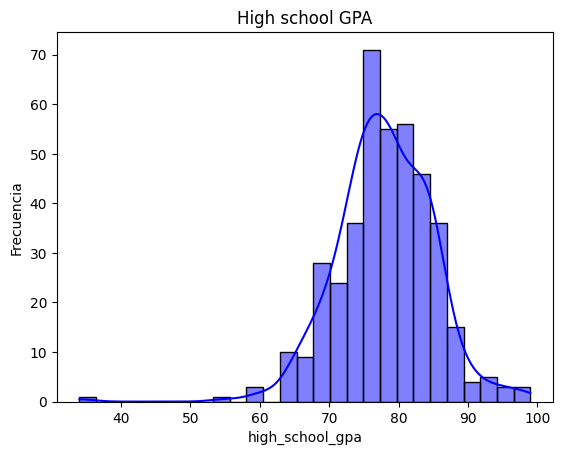

In [79]:
sns.histplot(data=df, x='high_school_gpa', kde=True, palette='viridis', color='blue')
plt.title("High school GPA", fontsize=12)
plt.xlabel("high_school_gpa")
plt.ylabel("Frecuencia")
plt.show()

In [80]:
df['high_school_gpa'].describe()

count    406.000000
mean      77.989901
std        6.987439
min       34.000000
25%       74.000000
50%       78.000000
75%       83.000000
max       99.000000
Name: high_school_gpa, dtype: float64

<AxesSubplot: xlabel='high_school_gpa'>

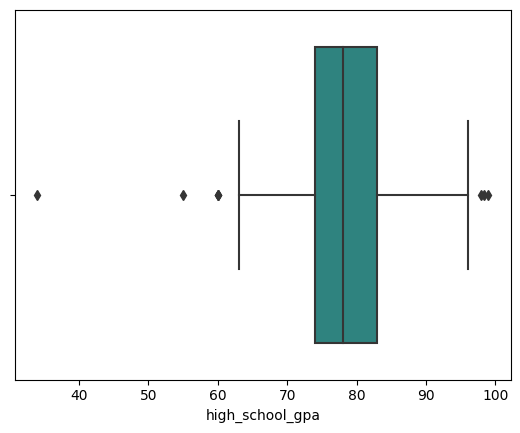

In [81]:
# Rombos en el diagrama de caja y bigote representan los outliers
# Se calculan de forma empírica (prueba de Tukey) IQR = Q3-Q1 (P75 - P25)
sns.boxplot(data=df, x='high_school_gpa', palette='viridis')

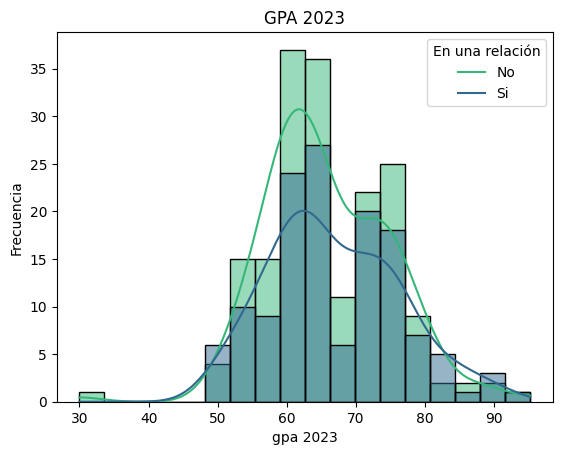

In [94]:
sns.histplot(data=df, x='gpa_2023', kde=True, palette='viridis', color='blue', hue='in_a_relationship')
plt.title("GPA 2023", fontsize=12)
plt.xlabel("gpa 2023")
plt.ylabel("Frecuencia")
plt.legend(title='En una relación', labels=['No','Si'])
plt.show()

Las relaciones no parecen afectar la media de las calificaciones de las personas. Tampoco se observa gran cantidad de valores atípicos por las relaciones

<AxesSubplot: xlabel='gpa_2023', ylabel='in_a_relationship'>

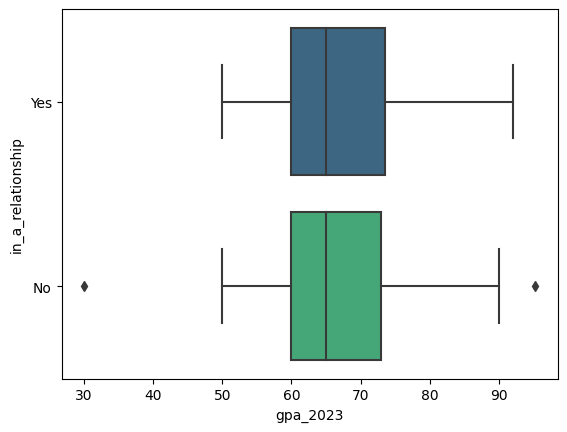

In [88]:
sns.boxplot(data=df, x='gpa_2023', palette='viridis', y='in_a_relationship')

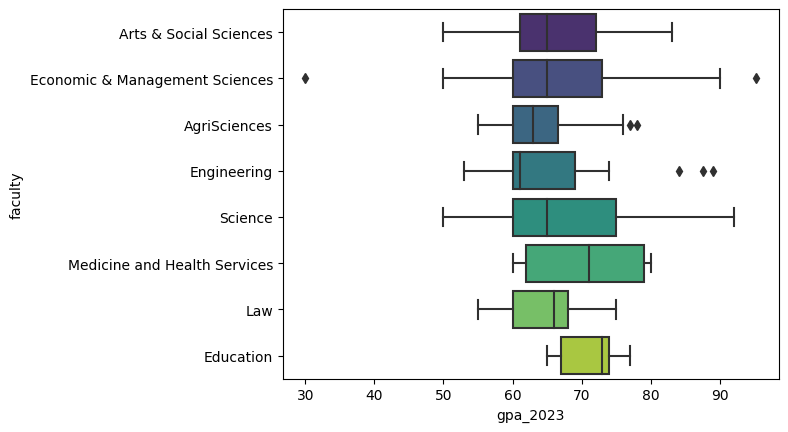

In [92]:
sns.boxplot(data=df, x='gpa_2023',y='faculty', palette='viridis')
plt.show()

<AxesSubplot: xlabel='gpa_2023', ylabel='faculty'>

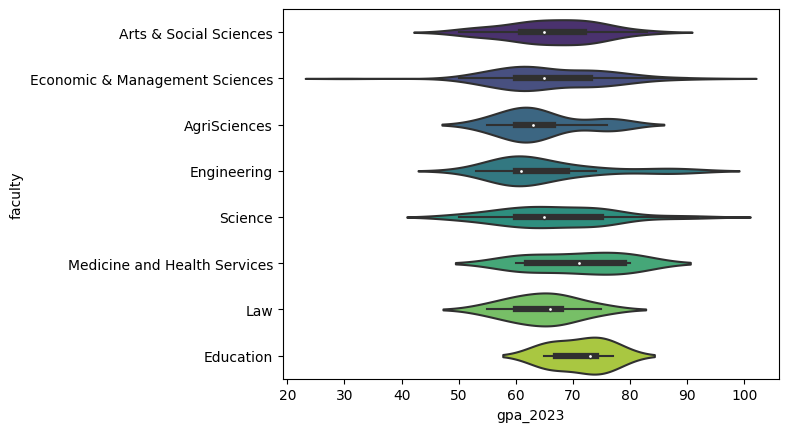

In [91]:
sns.violinplot(data=df, x='gpa_2023', palette='viridis', y='faculty')